In [1]:
import os
import sys

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.insert(0, '..')
import ccal

%matplotlib inline
# %config InlineBackend.figure_formats = {'svg',}

================= Computational Cancer Analysis Library (CCAL) =================
Planted a random seed: 20121020.


# Test with real data

## Define states

<191143> Loading distances between samples already computed ...
<191143> Consensus clustering with 30 clusterings ...
<191143> k=12 ...
<191143> 	Permuting distance matrix with repeat and clustering (0/30) ...
<191143> 	Permuting distance matrix with repeat and clustering (10/30) ...
<191143> 	Permuting distance matrix with repeat and clustering (20/30) ...
<191143> 	Making consensus matrix from 30 hierarchical clusterings of randomized distance matrix ...


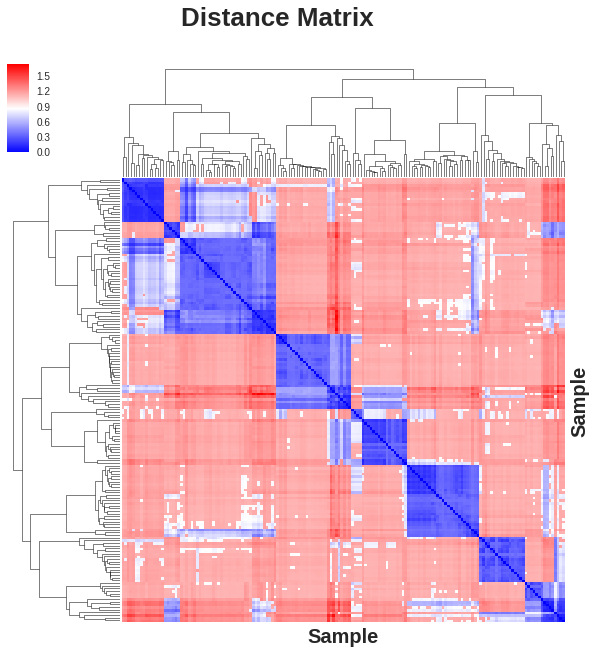

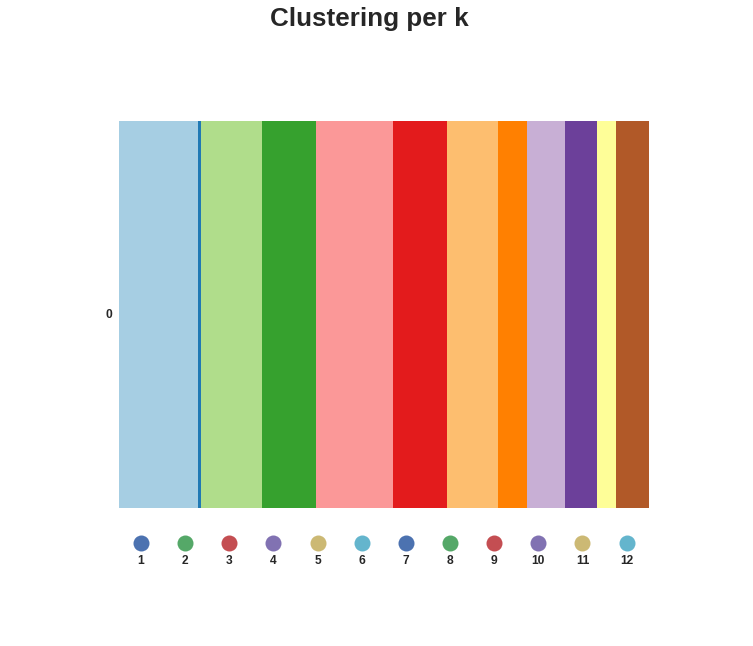

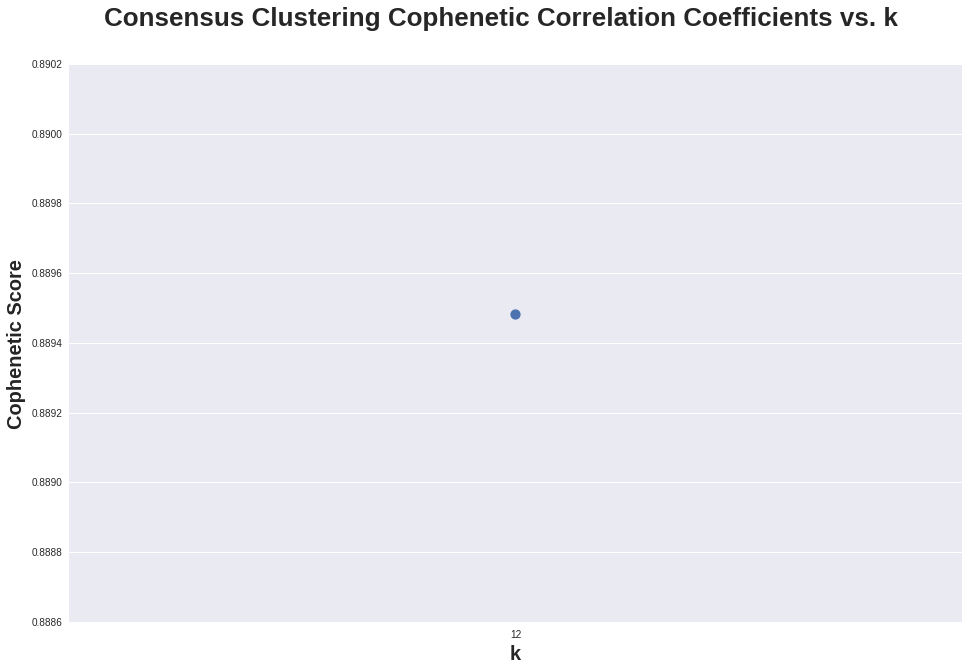

In [ ]:
h = ccal.support.read_gct('data/hema_k9_H.gct')
ks = [12]
# distance_matrix, clusterings, cophenetic_correlations = ccal.define_states(h,
#                                                                            ks,
#                                                                            n_clusterings=30,
#                                                                            max_std=5,
#                                                                            directory_path='result/define_states/')
distance_matrix, clusterings, cophenetic_correlations = ccal.define_states(h,
                                                                                 ks,
                                                                                 distance_matrix=ccal.read_gct('data/hema_k9_distance_matrix.gct'),
                                                                                 n_clusterings=30,
                                                                                 max_std=5)
state_labels = clusterings.ix[12, :]

## Make Onco-GPS

# Test with random data

## Make Onco-GPS

# Project samples

In [ ]:
ccal.make_oncogps_map(h, state_labels, testing_h=h, testing_states=state_labels)

************************************************88
training_h after _process

              A3KAW_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE  \
nmf_compC1_9                                  0.067606   
nmf_compC2_9                                  0.283697   
nmf_compC3_9                                  0.007913   
nmf_compC4_9                                  0.348267   
nmf_compC5_9                                  0.101841   
nmf_compC6_9                                  0.000008   
nmf_compC7_9                                  0.031987   
nmf_compC8_9                                  0.786625   
nmf_compC9_9                                  0.041350   

              A4FUK_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE  \
nmf_compC1_9                                  0.032751   
nmf_compC2_9                                  0.239177   
nmf_compC3_9                                  0.007230   
nmf_compC4_9                                  0.213136   
nmf_compC5_9                                  0.065

In [ ]:
h

In [ ]:
ccal.make_oncogps_map(h, state_labels)

In [ ]:
n = 10
ccal.onco_gps.make_map(h, states, h_test=h.iloc[:, :n], states_test=states[:n])
ccal.onco_gps.make_map(h, states, h_test=h.iloc[:, :n], states_test=states[:n], h_test_normalization='clip_and_0-1')
ccal.onco_gps.make_map(h, states, h_test=h.iloc[:, :n], states_test=states[:n], h_test_normalization=None)

# Test real data

In [ ]:
H = ccal.support.read_gct('/home/cyborg/Downloads/KRAS_Matrix.gct')

MEMBERSHIPS = pd.read_csv('/home/cyborg/Downloads/KRAS_membership.gct', sep='\t', index_col=0)
K17_MEMBERSHIPS = MEMBERSHIPS.ix[:, 'k_17']
K17_MEMBERSHIPS_INT = K17_MEMBERSHIPS.apply(lambda s: int(s[1:])).tolist()

In [ ]:
ccal.onco_gps.make_map(H, K17_MEMBERSHIPS_INT, background_markersize=0, background_mask_markersize=0)

In [ ]:
training_h = H
empty = np.empty
X = 3
Y = 10
ratios = empty(training_h.shape[1])
for i, (c_idx, c) in enumerate(training_h.iteritems()):
    c_sorted = c.sort_values(ascending=False)
    ratio = float(c_sorted[:X].sum() / c_sorted[X:].sum()) * c.sum()
    ratios[i] = ratio
normalized_ratios = (ratios - ratios.min()) / (ratios.max() - ratios.min())
normalized_ratios *= Y
normalized_ratios.clip(0, 1)

In [ ]:
ccal.onco_gps.make_map(H, K17_MEMBERSHIPS_INT, background_markersize=0, background_mask_markersize=0)

In [ ]:
RPKM = ccal.support.read_gct('/home/cyborg/data/ccle/ccle_rpkm.gct')

CD274_RPKM = RPKM.ix['CD274', :]
CD274_SAMPLES_IN_H = CD274_RPKM.index & H.columns
H_CD274 = H.ix[:, CD274_SAMPLES_IN_H]
K17_MEMNERSHIPS_CD274 = K17_MEMBERSHIPS.ix[CD274_SAMPLES_IN_H].apply(lambda s: int(s[1:])).tolist()

In [ ]:
ccal.onco_gps.make_map(H, K17_MEMBERSHIPS_INT, annotations=CD274_RPKM.ix[H.columns])

In [ ]:
ccal.onco_gps.make_map(H, K17_MEMBERSHIPS_INT, h_test=H_CD274, states_test=K17_MEMNERSHIPS_CD274, annotations=CD274_RPKM.ix[H_CD274.columns])